In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, '$CO_2$ (GigaTons Carbon)')

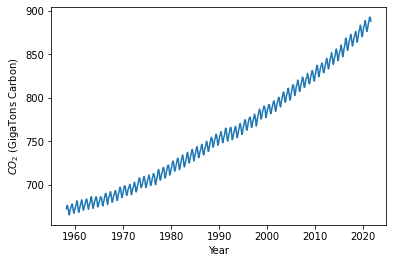

In [2]:
filename='../Data/co2_mm_mlo.txt'
day=np.loadtxt(filename).T[2]
co2=np.loadtxt(filename).T[3]
gtc=2.13 # global tons of carbon for 1 ppm
plt.plot(day,co2*gtc)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')

Text(0, 0.5, '$CO_2$ (GigaTons Carbon)')

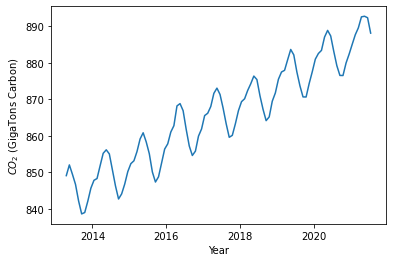

In [3]:
plt.plot(day[-100:],co2[-100:]*gtc)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')

There is more CO2 in the atmosphere in Northern Spring and less in the Fall. This reflects the fact that throughout the winter the plants are decaying and returing CO2 to the atmosphere. Then in the Spring, the plants start recapturing the CO2 to grow so that by Fall the atmospheric CO2 is a minimum.

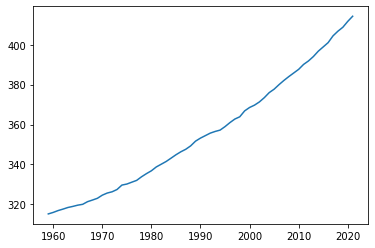

In [4]:
## Get the mean co2 in a given year
cyear=[]
for d in day:
    cyear.append(np.floor(d))
oldy=0.
year=[]
coy=[]
co=0.
for i,y in enumerate(cyear):
   if (y==oldy): 
       co+=co2[i]
       n+=1
   else:
       oldy=y
       if i > 0:
        year.append(y)
        coy.append(co/n)
       n=1
       co=co2[i]
plt.plot(year,coy)

In [5]:
%pwd


'/Users/scottdodelson/CMU/Courses/Energy/Code'

In [6]:
co2=pd.read_csv('../Data/co2-data/owid-co2-data.csv')
temperature_year=np.loadtxt('../Data/temperatures.txt').T[0]
temperature=np.loadtxt('../Data/temperatures.txt').T[1]

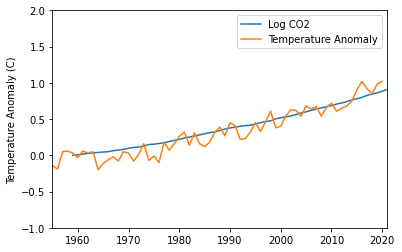

In [7]:
n=np.size(year)

plt.plot(year,2.3*np.log2(coy/coy[0]),label='Log CO2')
plt.plot(temperature_year,temperature,label='Temperature Anomaly')
plt.axis([1955,2021,-1,2])
plt.ylabel('Temperature Anomaly (C)')
plt.legend()


In [8]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [9]:
co2.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
co2.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,46523.000000,3.857400e+04,1.455100e+04,24974.000000,22714.000000,31349.000000,28944.000000,25032.00000,24212.000000,23909.000000,...,2386.000000,15980.000000,21990.000000,39388.000000,23421.000000,2386.000000,6149.000000,6149.000000,4259.000000,4258.000000
mean,1925.686478,6.005374e+07,2.679977e+11,8.386360,0.063951,379.988086,5.713769,20.49020,498.910897,7.199529,...,20.419026,2.031528,2.823148,2.557844,3.325418,20.674301,771.485168,748.578502,-8.700524,20.463351
std,61.042693,3.280828e+08,2.104075e+12,63.013581,0.123027,1799.875801,58.766151,699.58006,2079.556855,92.510589,...,34.055772,8.955692,13.680777,10.088827,12.789886,34.319489,3553.425123,3488.004825,269.211180,53.737502
min,1750.000000,2.100000e+01,4.998000e+07,0.000000,0.000000,0.000000,-1818.472000,-100.00000,-187.032000,-2317.996000,...,0.000000,0.000000,0.000000,-6.498000,0.000000,0.000000,-186.550000,0.010000,-2354.781000,-98.279000
25%,1882.000000,3.808912e+05,7.530493e+09,0.000000,0.000000,0.125000,0.000000,-0.54300,4.652750,-0.575000,...,0.231000,0.000000,0.000000,0.001000,0.005000,0.339000,8.440000,7.030000,-3.148000,-6.495750
50%,1930.000000,2.509282e+06,2.605900e+10,0.010000,0.005000,3.109000,0.015000,3.78750,24.430000,0.062000,...,1.159500,0.000000,0.000000,0.072000,0.061000,1.583500,38.050000,30.600000,1.484000,8.875000
75%,1977.000000,9.996447e+06,1.134711e+11,0.691750,0.087000,43.660000,0.773000,10.58075,113.395750,2.320000,...,23.403500,0.051000,0.123000,0.485000,0.518000,22.523500,151.150000,131.320000,9.029500,32.949250
max,2021.000000,7.909295e+09,1.136302e+14,1672.592000,2.574000,37123.852000,1859.764000,102318.50800,41639.840000,2228.633000,...,100.000000,100.000000,100.000000,100.829000,100.000000,100.000000,49758.230000,48116.559000,2211.852000,607.521000


In [11]:

worst=co2[co2['co2']>36440.]
print(worst)

      country  year iso_code    population           gdp  cement_co2  \
46003   World  2018      NaN  7.683790e+09  1.136302e+14    1569.218   
46004   World  2019      NaN  7.764951e+09           NaN    1617.507   
46006   World  2021      NaN  7.909295e+09           NaN    1672.592   

       cement_co2_per_capita        co2  co2_growth_abs  co2_growth_prct  ...  \
46003                  0.204  36826.508         729.772            2.022  ...   
46004                  0.208  37082.559         256.049            0.695  ...   
46006                  0.211  37123.852        1859.764            5.274  ...   

       share_global_cumulative_other_co2  share_global_flaring_co2  \
46003                              100.0                     100.0   
46004                              100.0                     100.0   
46006                              100.0                     100.0   

       share_global_gas_co2  share_global_luc_co2  share_global_oil_co2  \
46003                 100.0   

In [12]:
co2us=co2[co2['country']=='World']

In [13]:
emit=co2us['co2']
year=np.array(co2us['year'])

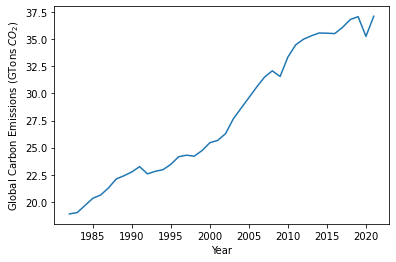

In [15]:
plt.plot(year[-40:],emit[-40:]/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTons $CO_2$)')
plt.savefig('../Figures/co2gt.png')

Text(0, 0.5, 'Global Carbon Emissions (GTC)')

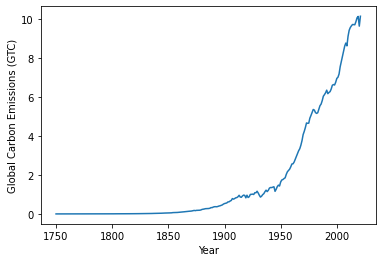

In [19]:
plt.plot(year,emit/3.664/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTC)')

2021
463.92090010917025


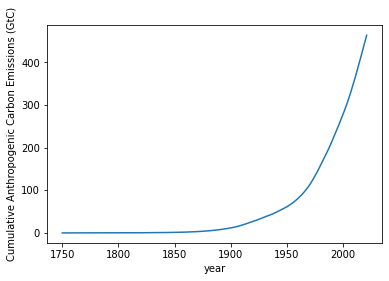

In [20]:
n=np.size(emit)
cum=np.zeros(n)
for i in range(n):
    cum[i]=np.sum(emit[:i])
plt.plot(year,cum/3.664/1.e3)
plt.xlabel('year')
plt.ylabel('Cumulative Anthropogenic Carbon Emissions (GtC)')
print(year[-1])
print(cum[-1]/3.664/1.e3)

Text(0, 0.5, 'Emissions (GtC)')

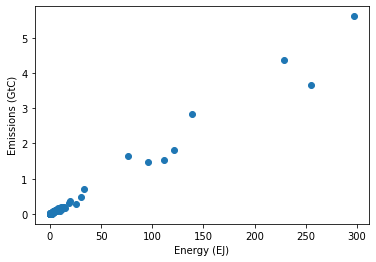

In [21]:
co22019=co2[co2['year']==2018]
co22019=co22019[co22019['country']!='World']
emissions=co22019['co2']
gdp=co22019['gdp']
population=co22019['population']
epc=co22019['energy_per_capita']
energy=epc*population  # in kilowatt-hours
kwhour=3600.*1000. #J
plt.scatter(energy*kwhour/1.e18,emissions/1.e3/3.644)
plt.xlabel('Energy (EJ)')
plt.ylabel('Emissions (GtC)')

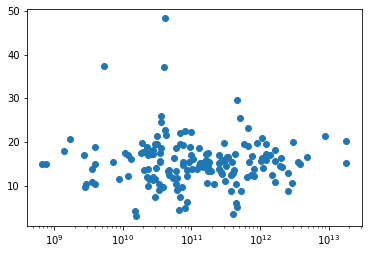

In [22]:
emissions_gm=emissions*1.e12/3.664 # emissions are in Mtonnes of CO_2; to get to grams, divide by this
intensity=emissions_gm/(energy*kwhour/1.e6) #gm/MJ
plt.scatter(gdp,intensity)
plt.xscale('log')

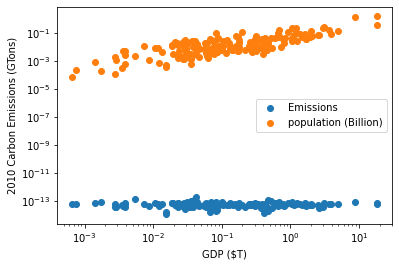

In [23]:
plt.scatter(gdp/1.e12,emissions/1.e3/3.664/energy,label='Emissions')
plt.xlabel('GDP ($T)')
plt.ylabel('2010 Carbon Emissions (GTons)')
plt.scatter(gdp/1.e12,population/1.e9,label='population (Billion)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

242
165
(165, 2) (165,)
[ 1.15127848 -0.15936307] -3.28544157950044
0.9276033712000906


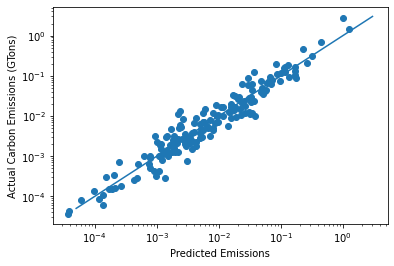

In [34]:
co22019=co2[co2['year']==2018]
co22019=co22019[co22019['country']!='World']
emissions=co22019['co2']
gdp=co22019['gdp']
population=co22019['population']
#Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
## clean up nans
n=np.size(emissions)
print(n)
for i in gdp.index:
    if (np.isnan(gdp[i]) or np.isnan(emissions[i]) or np.isnan(population[i])): 
        del gdp[i]
        del emissions[i]
        del population[i]
n=np.size(emissions)
print(n)
emissions=emissions.values/1.e3/3.664
gdp=gdp.values/1.e12
population=population.values/1.e9
#gdp=gdp.reshape(-1,1)
#print(emissions)
#emissions=emissions.reshape(-1,1)
X=np.transpose([np.log(gdp),np.log(population)])
print(np.shape(X),np.shape(emissions))
lin_reg.fit(X,np.log(emissions))
print(lin_reg.coef_,lin_reg.intercept_)
x=np.arange(0,20,.0001)
#x.reshape(-1,1)
plt.scatter(np.exp(lin_reg.predict(X)),(emissions))#,label='2D Regression Fit')
#plt.scatter(gdp,emissions,label='Data')
plt.xlabel('Predicted Emissions')
plt.ylabel('Actual Carbon Emissions (GTons)')
plt.plot([5.e-5,3],[5.e-5,3])
#plt.axis([5.e-4,3,1.e-4,3])
plt.yscale('log')
plt.xscale('log')
print(lin_reg.score(X,np.log(emissions)))

If you extrapolate that fit to the world, which has a much higher population and GDP than any other point, what will happen? Well, maybe China is a good example: it has 1/7 of the population and the model tries to fit it but still under-predicts. So, likely for the world, the model will underpredict the actual emissions. And that is correct: the next box shows that the model predicts 6, while the data is 50% higher.

In [270]:
world=co2[co2['year']==2010]
world=world[world['country']=='World']
gdp=world['gdp'].values/1.e12
pop=world['population'].values/1.e9
emissions=world['co2'].values/3.664/1.e3
X=np.transpose([np.log(gdp),np.log(pop)])
print(np.exp(lin_reg.predict(X)))
print(emissions)

[5.89703261]
[9.04255213]


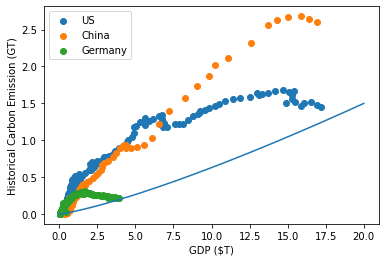

In [246]:
us=co2[co2['country']=='United States']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
plt.scatter(ugdp,uco2,label='US')

us=co2[co2['country']=='China']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
plt.scatter(ugdp,uco2,label='China')

us=co2[co2['country']=='Germany']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
plt.scatter(ugdp,uco2,label='Germany')

x=np.arange(.01,20,.001)
plt.xlabel('GDP ($T)')
plt.ylabel('Historical Carbon Emission (GT)')
plt.plot(x,np.exp(lin_reg.coef_[0]*np.log(x)+lin_reg.intercept_))
plt.legend()


Text(0.5, 1.0, 'United States')

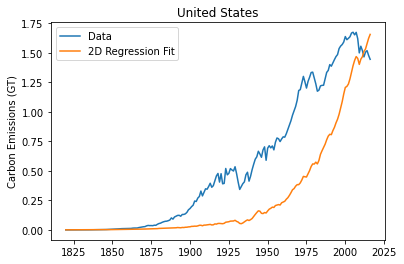

In [275]:
country='United States'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)


Text(0.5, 1.0, 'China')

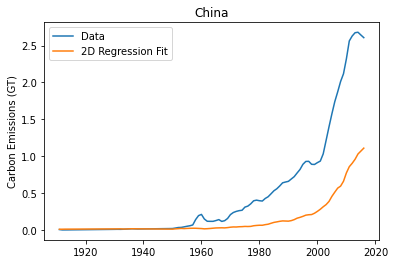

In [276]:
country='China'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')

plt.title(country)

Text(0.5, 1.0, 'India')

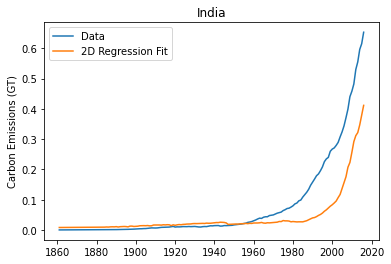

In [277]:
country='India'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')

plt.title(country)

Text(0.5, 1.0, 'Israel')

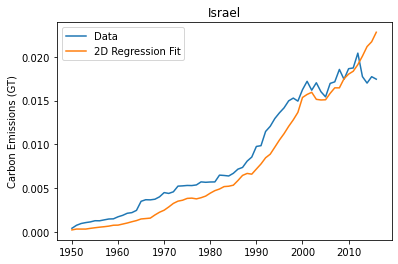

In [250]:
country='Israel'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'Japan')

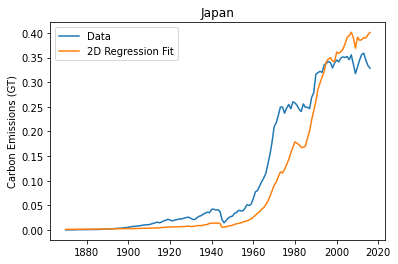

In [251]:
country='Japan'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'World')

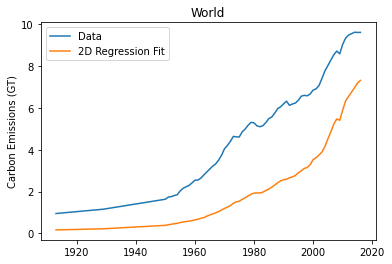

In [252]:
country='World'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'Indonesia')

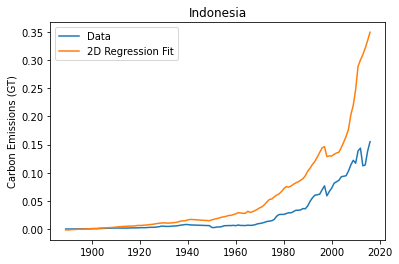

In [215]:
country='Indonesia'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([ugdp,upop])
plt.plot(yr,lin_reg.predict(X),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0, 0.5, 'Energy (EJ)')

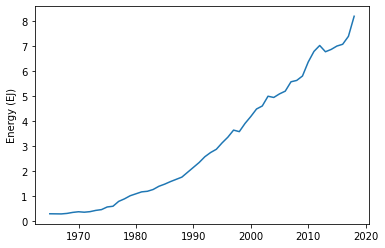

In [120]:
country='Indonesia'
us=co2[co2['country']==country]
ugdp=us['gdp']
energy=us['energy_per_gdp']# in kilowatt-hours/$
kwhour=1.e3*3600
yr=us['year']
plt.plot(yr,energy*ugdp*kwhour/1.e18)
plt.ylabel('Energy (EJ)')
